In [1]:
import sys
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
import ast
import sqlite3 as db
import scipy.sparse
import scipy as sp

print("Python version: {}".format(sys.version))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("sqlite3 version: {}".format(db.version))

Python version: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.25.1
numpy version: 1.17.2
sqlite3 version: 2.6.0


In [10]:
#Read the file
raw_data = pd.read_csv("PP_users.csv")
#Observe types
for col in ['u','techniques','items','n_items','ratings','n_ratings']:
    print("Column '{}' has type {}.".format(col, type(raw_data[col].iloc[0])))

Column 'u' has type <class 'numpy.int64'>.
Column 'techniques' has type <class 'str'>.
Column 'items' has type <class 'str'>.
Column 'n_items' has type <class 'numpy.int64'>.
Column 'ratings' has type <class 'str'>.
Column 'n_ratings' has type <class 'numpy.int64'>.


In [3]:
display(raw_data)

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376
...,...,...,...,...,...,...
25071,25071,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[144172, 154054]",2,"[5.0, 5.0]",2
25072,25072,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[162436, 148228]",2,"[5.0, 5.0]",2
25073,25073,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[162681, 172034]",2,"[5.0, 5.0]",2
25074,25074,"[2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[157808, 159896]",2,"[5.0, 5.0]",2


In [4]:
#Sort the number of recipes rated in descending order. 
RowNum = np.argsort(-raw_data['n_ratings'])
Rating_sorted = raw_data.iloc[RowNum]
Rating_sorted

,u,techniques,items,n_items,ratings,n_ratings
94,94,"[2508, 26, 18, 1319, 1516, 1, 5, 123, 29, 2488...","[91791, 3798, 150824, 101819, 32984, 137191, 1...",6437,"[4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, ...",6437
275,275,"[977, 19, 15, 772, 981, 2, 9, 164, 28, 1556, 3...","[149428, 147083, 83459, 11578, 70918, 78548, 8...",4581,"[5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",4581
193,193,"[997, 46, 2, 531, 613, 2, 3, 144, 21, 1206, 33...","[135512, 164305, 41269, 133049, 134610, 85304,...",3656,"[5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 3.0, ...",3656
241,241,"[1112, 15, 12, 638, 979, 2, 0, 72, 11, 1180, 3...","[76442, 164837, 5559, 149181, 3020, 39614, 148...",3465,"[0.0, 4.0, 4.0, 4.0, 0.0, 5.0, 5.0, 1.0, 5.0, ...",3465
208,208,"[1175, 27, 6, 631, 713, 2, 1, 76, 22, 1187, 22...","[48637, 136663, 97290, 45833, 161663, 26019, 1...",3338,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, ...",3338
...,...,...,...,...,...,...
18222,18222,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[134463, 161768]",2,"[3.0, 5.0]",2
18212,18212,"[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[24869, 174459]",2,"[4.0, 5.0]",2
18211,18211,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[174552, 24869]",2,"[5.0, 5.0]",2
18205,18205,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[41144, 97490]",2,"[5.0, 5.0]",2


In [33]:
def str2list(data, column):
    for i in range(data.shape[0]):
        data[column][i] = ast.literal_eval(data[column][i]) 

In [34]:
def unstacking(data, column, new_column):
    s = data.apply(lambda x: pd.Series(x[column]),axis=1).stack().reset_index(level=1, drop=True)
    s.name = new_column
    new_data = data.drop(['items','ratings'], axis=1).join(s)
    
    return new_data

In [35]:
def node_edge(similarity_matrix):
    sim_score = []
    for i in range(len(similarity_matrix)):
        for j in range(len(similarity_matrix)):
            if i<j:
                sim_score.append(similarity_matrix[i][j])
                
    #Get the pairs of nodes
    userIDs = list(similarity_matrix.index)
    pairs = []
    
    a = ((x, y) for x in userIDs for y in userIDs if y > x)
    
    for p in a:
        pairs.append(p)

    node_A = []
    node_B = []
    
    for p in pairs:
        node_A.append(p[0])
        node_B.append(p[1])
    
    node_edge = pd.DataFrame(list(zip(node_A, node_B, sim_score)),
                   columns =['node_A', 'node_B', 'sim_score'])

    #sort by similarity score (desc.)
    node_edge = node_edge.sort_values(by=['sim_score'],ascending=False)
    
    return node_edge

In [36]:
#Method 2.Use COO matrix
import matplotlib.pyplot as plt
%matplotlib inline

def spy(A, figsize=(6,6), markersize=0.5):
    fig = plt.figure(figsize=figsize)
    plt.spy(A, markersize=markersize)
    plt.show()

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

def cos_sim(matrix):
    
    return cosine_similarity(P)


In [10]:
data = Rating_sorted[['u','items','n_items','ratings']]
str2list(data, 'items')
str2list(data, 'ratings')

/Users/donghee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/donghee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#display data
data

,u,items,n_items,ratings
94,94,"[91791, 3798, 150824, 101819, 32984, 137191, 1...",6437,"[4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, ..."
275,275,"[149428, 147083, 83459, 11578, 70918, 78548, 8...",4581,"[5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
193,193,"[135512, 164305, 41269, 133049, 134610, 85304,...",3656,"[5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 3.0, ..."
241,241,"[76442, 164837, 5559, 149181, 3020, 39614, 148...",3465,"[0.0, 4.0, 4.0, 4.0, 0.0, 5.0, 5.0, 1.0, 5.0, ..."
208,208,"[48637, 136663, 97290, 45833, 161663, 26019, 1...",3338,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, ..."
...,...,...,...,...
18222,18222,"[134463, 161768]",2,"[3.0, 5.0]"
18212,18212,"[24869, 174459]",2,"[4.0, 5.0]"
18211,18211,"[174552, 24869]",2,"[5.0, 5.0]"
18205,18205,"[41144, 97490]",2,"[5.0, 5.0]"


In [12]:
#Unstack 'items' and 'ratings' 
data_items = unstacking(data, 'items', 'item')
data_ratings = unstacking(data, 'ratings','rating')

In [13]:
concat = pd.concat([data_items, data_ratings], axis=1)
unstacked_data = concat[['item','rating']]
unstacked_data['userID'] = unstacked_data.index

/Users/donghee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
unstacked_data

,item,rating,userID
0,1118.0,5.0,0
0,27680.0,5.0,0
0,32541.0,5.0,0
0,137353.0,5.0,0
0,16428.0,5.0,0
...,...,...,...
25073,172034.0,5.0,25073
25074,157808.0,5.0,25074
25074,159896.0,5.0,25074
25075,166686.0,4.0,25075


In [15]:
def getListItemByU(userID):
    return list(unstacked_data[unstacked_data['userID']==userID]['item'])

In [16]:
def CommonItemsPerc(userA, userB):
    a = getListItemByU(userA)
    b = getListItemByU(userB)
    n_items_A = len(a)
    n_items_B = len(b)
    intersection = set(a).intersection(set(b))
    n_inter = len(intersection)
    return max(round(n_inter/n_items_A,2), round(n_inter/n_items_B,2))
    

In [17]:
CommonItemsPerc(5248, 989)

0.02

In [18]:
users_sample = [2203, 2605, 1372, 1908, 5248, 3179, 1013, 989, 5423, 135, 6267, 7547]

In [19]:
#Get all pairs of the selected users
all_pairs = [(a, b) for idx, a in enumerate(users_sample) for b in users_sample[idx + 1:]]

In [20]:
for p in all_pairs:
    if CommonItemsPerc(p[0],p[1]) > 0.2:
        print(p, CommonItemsPerc(p[0],p[1]))

In [21]:
#float to int
unstacked_data['item'] = unstacked_data['item'].astype(int)

/Users/donghee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


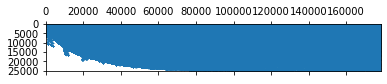

In [22]:
P = sp.sparse.coo_matrix((unstacked_data['rating'], (unstacked_data['userID'], unstacked_data['item'])))
spy(P)

In [39]:
P.shape

(25076, 178263)

In [23]:
sim_matrix = cos_sim(P)

In [24]:
sim_matrix = pd.DataFrame(sim_matrix)

In [25]:
sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,25066,25067,25068,25069,25070,25071,25072,25073,25074,25075
0,1.000000,0.024077,0.0,0.007903,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,0.024077,1.000000,0.0,0.000000,0.016706,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,0.007903,0.000000,0.0,1.000000,0.031072,0.011325,0.0,0.0,0.044998,0.0,...,0.0,0.0,0.01036,0.018756,0.026011,0.0,0.015005,0.018756,0.0,0.0
4,0.000000,0.016706,0.0,0.031072,1.000000,0.012585,0.0,0.0,0.022079,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25071,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.0
25072,0.000000,0.000000,0.0,0.015005,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.0
25073,0.000000,0.000000,0.0,0.018756,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0
25074,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.0


In [26]:
n_users = len(sim_matrix)
sim_sample = sim_matrix.loc[users_sample,:]

In [27]:
sim_sample

,0,1,2,3,4,5,6,7,8,9,...,25066,25067,25068,25069,25070,25071,25072,25073,25074,25075
2203,0.000000,0.015631,0.000000,0.027639,0.015764,0.014430,0.0,0.0,0.013451,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2605,0.000000,0.000000,0.000000,0.038032,0.024215,0.004840,0.0,0.0,0.032884,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.038476,0.0,0.0
1372,0.000000,0.000000,0.007219,0.025224,0.020262,0.005107,0.0,0.0,0.010568,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1908,0.000000,0.000000,0.000000,0.037852,0.020205,0.006955,0.0,0.0,0.012435,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
5248,0.000000,0.003551,0.000000,0.043239,0.013119,0.003752,0.0,0.0,0.029193,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3179,0.000000,0.000000,0.000000,0.008587,0.006196,0.000000,0.0,0.0,0.007627,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1013,0.000000,0.000000,0.000000,0.018264,0.005202,0.000000,0.0,0.0,0.024333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
989,0.000000,0.000000,0.000000,0.014872,0.004599,0.000000,0.0,0.0,0.005661,0.044775,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
5423,0.017431,0.000000,0.000000,0.023216,0.030907,0.008326,0.0,0.0,0.041352,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.082738,0.0,0.000000,0.0,0.0
135,0.014250,0.012369,0.000000,0.029230,0.003515,0.004356,0.0,0.0,0.042190,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [28]:
def DictUserNodeEdge(ListUsers_selected,matrix):
    
    keys = ListUsers_selected
    node_edge = dict.fromkeys(keys, [])
    unscaled_edges = []
    
    for user in keys:
        for col in range(matrix.shape[1]):
            if (matrix.loc[user,col]!=0) & (user != col):
                unscaled_edges.append(matrix.loc[user,col])
                
    xmax = scale_zero_one(unscaled_edges)[0]
    xmin = scale_zero_one(unscaled_edges)[1]
    
    for user in keys:
        for col in range(matrix.shape[1]):
            if (matrix.loc[user,col]!=0) & (user != col):
                x = matrix.loc[user,col]
                userB_edge = (col,((x - xmin) / (xmax - xmin)))
                node_edge[user].append(userB_edge)
                
    return node_edge
    
    

In [29]:
def Dict2Matrix(d,col_names=['userA','userB','edge']):
    n_users = len(d)
    users_selected = d.keys()
    
    pd.DataFrame()

In [30]:
def scale_zero_one(ListNumbers):
    
    xmax = max(ListNumbers)
    xmin = min(ListNumbers)
    scaledX = []
    
    for x in ListNumbers:
        scaledX.append((x - xmin) / (xmax - xmin))
    
    return xmax, xmin

In [31]:
f = DictUserNodeEdge(users_sample, sim_sample)

In [33]:
for k,v in f.items():
    for t in v:
        if t[1] < 0.7:
            v.remove(t)

In [35]:
userA = []
userB = []
edge = []
for k, v in f.items():
    userA += [k]*len(v)
    for t in v:
        userB.append(t[0])
        edge.append(t[1])

In [36]:
user_similarity = pd.DataFrame(list(zip(userA, userB, edge)),
              columns=['userA','userB', 'edge'])

In [37]:
user_similarity

,userA,userB,edge
0,2203,9171,0.028304
1,2203,1273,0.029977
2,2203,14127,0.110139
3,2203,7063,0.005637
4,2203,5355,0.111935
...,...,...,...
331,7547,23065,0.923657
332,7547,23272,0.706709
333,7547,23375,0.706709
334,7547,23543,0.857299
